!pip install yellowbrick
!pip install missingno
!pip install seaborn
!pip install folium
!pip install plotly

In [12]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale

locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

# Carregar os dados
compras_df = pd.read_csv(r"C:\Users\picin\OneDrive\Área de Trabalho\ModeloFinal\desafio_tecnico_dados_de_compras_covid_19.csv", encoding="ISO-8859-1")


compras_df['VALOR_TOTAL'] = compras_df['VALOR_TOTAL'].apply(lambda x: str(x).replace("R$","").replace(" ","").replace(".","").replace(",","."))
compras_df['VALOR_TOTAL'] = compras_df['VALOR_TOTAL'].astype('float64')

# Verificar as primeiras linhas dos dados
compras_df.head()
compras_df
compras_df.info()
compras_df['VALOR_TOTAL'] 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93189 entries, 0 to 93188
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   COD_COMPRA              93189 non-null  int64  
 1   COD_ITEM                93189 non-null  object 
 2   NUM_ITEM                93189 non-null  int64  
 3   QUANTIDADE              93189 non-null  int64  
 4   TIPO                    93189 non-null  object 
 5   CATMAT_CATSER           93189 non-null  int64  
 6   ITEM_DESCRICAO          93189 non-null  object 
 7   UNIDADE                 93189 non-null  object 
 8   PRECO_UNITARIO          93188 non-null  object 
 9   VALOR_TOTAL             93188 non-null  float64
 10  CNPJ                    54524 non-null  object 
 11  RAZAO_SOCIAL            54524 non-null  object 
 12  DATA                    93189 non-null  object 
 13  SISG                    93189 non-null  object 
 14  COD_UASG                93189 non-null

0              0.0
1              0.0
2              0.0
3              0.0
4              0.0
           ...    
93184    2595600.0
93185          0.0
93186     300000.0
93187          0.0
93188    5170000.0
Name: VALOR_TOTAL, Length: 93189, dtype: float64

In [13]:

valor_medio_com_contrato = 0.0
valor_medio_sem_contrato = 0.0

# Criei contadores para acompanhar o número de compras com e sem contrato
contador_com_contrato = 0
contador_sem_contrato = 0


for index, row in compras_df.iterrows():
    valor_total = row['VALOR_TOTAL']
    tem_contrato = not pd.isna(row['IT_CO_CONTRATO'])
    
    if pd.notna(valor_total):
        valor_total = float(valor_total)
        
        if tem_contrato:
            valor_medio_com_contrato += valor_total
            contador_com_contrato += 1
        else:
            valor_medio_sem_contrato += valor_total
            contador_sem_contrato += 1

# Calculando o valor médio das compras com e sem contrato
if contador_com_contrato > 0:
    valor_medio_com_contrato /= contador_com_contrato

if contador_sem_contrato > 0:
    valor_medio_sem_contrato /= contador_sem_contrato

valor_medio_com_contrato, valor_medio_sem_contrato


(94090017.33157048, 19940908.9853893)

In [14]:


# Converte os valores para float e calculei o valor médio das compras com e sem contrato
valor_medio_com_contrato = compras_df[compras_df['IT_CO_CONTRATO'].notna()]['VALOR_TOTAL'].astype(float).mean()
valor_medio_sem_contrato = compras_df[compras_df['IT_CO_CONTRATO'].isna()]['VALOR_TOTAL'].astype(float).mean()

valor_medio_com_contrato, valor_medio_sem_contrato

(94090017.33157048, 19940908.9853893)

In [15]:
# Encontrando os três fornecedores que mais realizaram vendas
top_fornecedores = compras_df['RAZAO_SOCIAL'].value_counts().head(3)
top_fornecedores


RAZAO_SOCIAL
LIFE TECHNOLOGIES BRASIL COMERCIO E INDUSTRIA DE PRODUTOS PARA BIOTECNOLOGIA LTD    487
CRISTALIA PRODUTOS QUIMICOS FARMACEUTICOS LTDA                                      474
SIGMA-ALDRICH BRASIL LTDA                                                           325
Name: count, dtype: int64

In [16]:
# Encontrando o item mais comprado
item_mais_comprado = compras_df['ITEM_DESCRICAO'].value_counts().idxmax()
item_mais_comprado


'LUVA PARA PROCEDIMENTO NÃ\x83O CIRÃ\x9aRGICO'

In [17]:
# Calculando a correlação entre o valor da compra e a existência de contrato
correlacao = compras_df['VALOR_TOTAL'].corr(compras_df['PROCESSO_CONTRATO'].notna().astype(int))
correlacao


0.006324728478100778

C:\Users\picin\AppData\Local\Temp\ipykernel_21944\3671367979.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  compras_df['DATA'] = pd.to_datetime(compras_df['DATA'])


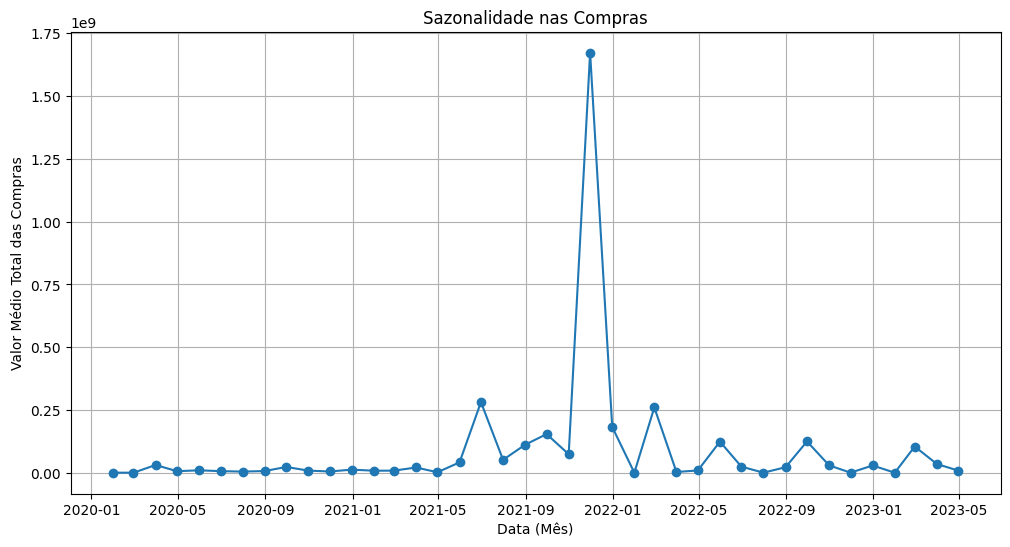

In [18]:
# Converter a coluna 'DATA' para o tipo de data(Isso meu deu MUUUITO trabalho)
compras_df['DATA'] = pd.to_datetime(compras_df['DATA'])

# Agrupar as compras por mês e calcular a média do valor total
media_valor_por_mes = compras_df.resample('M', on='DATA')['VALOR_TOTAL'].mean()

# Plotar um gráfico de linha para visualizar a sazonalidade
plt.figure(figsize=(12, 6))
plt.plot(media_valor_por_mes.index, media_valor_por_mes.values, marker='o')
plt.title('Sazonalidade nas Compras')
plt.xlabel('Data (Mês)')
plt.ylabel('Valor Médio Total das Compras')
plt.grid(True)
plt.show()


In [19]:
# Encontrar os principais órgãos compradores
top_orgaos_compradores = compras_df['ORGAO'].value_counts().head(3)
top_orgaos_compradores


ORGAO
COMANDO DO EXERCITO                             11455
EMPRESA BRASILEIRA DE SERVIÃOS HOSPITALARES     7003
ESTADO DO PARANA                                 4442
Name: count, dtype: int64

In [20]:
# Encontrar a modalidade de compra mais utilizada
modalidade_mais_utilizada = compras_df['MODALIDADE'].value_counts().idxmax()
modalidade_mais_utilizada


'Dispensa de LicitaÃ§Ã£o'

c:\Users\picin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


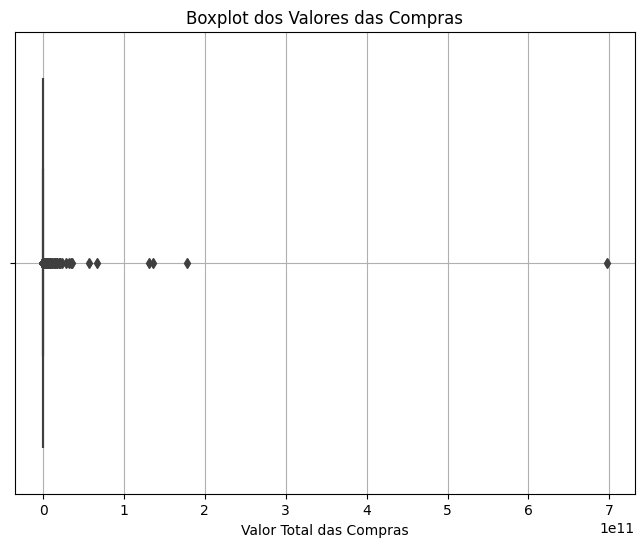

In [21]:
# Plotar um boxplot para identificar outliers nos valores das compras
plt.figure(figsize=(8, 6))
sns.boxplot(x='VALOR_TOTAL', data=compras_df)
plt.title('Boxplot dos Valores das Compras')
plt.xlabel('Valor Total das Compras')
plt.grid(True)
plt.show()


In [22]:
# Encontrar os Estados com o maior número de compras
estados_mais_compras = compras_df['UF'].value_counts().head()
estados_mais_compras


UF
RJ    12880
MG     7828
PR     7096
RS     6586
PA     4829
Name: count, dtype: int64